In [1]:
# Import IBIS
import sys
from ibis_codes_2025 import IBIS_Main

In [2]:
test = IBIS_Main.IBIS('filepath_to_schorndorfdata/Schorndorf_2023_IBIS_Input.xlsx',
    sample_name='Schorndorf2023',          
    MCMC_samples=600000,
    MCMC_burn_in=100000,
    MCMC_Strat_samples=500000,
    n_chains=3,
    Start_from_pickles=True, 
    show_bird=False, 
    method='thoth'
)


Data loaded successfully from /Users/jackcarter/Documents/Initial_Thorium/Schorndorf_2023_IBIS_Input.xlsx (Excel)


In [34]:
#test.Set_Up_MCMC()

(<Figure size 550x480 with 1 Axes>,
 <Axes: xlabel='$^{230}$Th/$^{232}$Th initial', ylabel='Density'>)

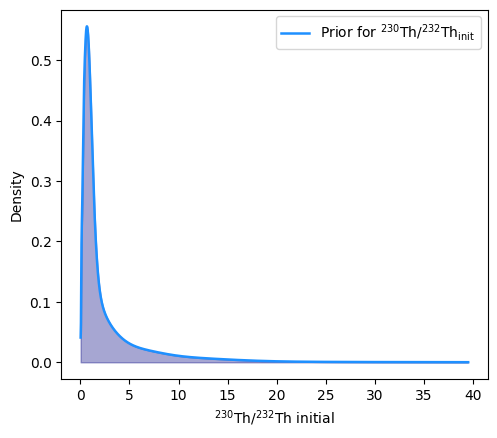

In [4]:
test.Plot_Priors()

In [5]:
test.Run_MCMC()

Generating new starting θ’s


In [6]:
test.SaveSummary()

Summary saved to Schorndorf2023_ibis_summary.csv


In [7]:
test.Save_All()

Initial thorium model data saved to Schorndorf2023_Initial_Thoriums.xlsx
Useries age model data saved to Schorndorf2023_U_Series_Ages.xlsx
Initial 234U saved to Schorndorf2023_Initial_234U.xlsx


In [8]:
test.Run_MCMC_Strat()

File 'Schorndorf2023_U_Series_Ages.xlsx' exists. Skipping initial MCMC and running stratigraphy MCMC directly. Sit Tight. Time for a cup of tea.
Starting from linear-fit guesses


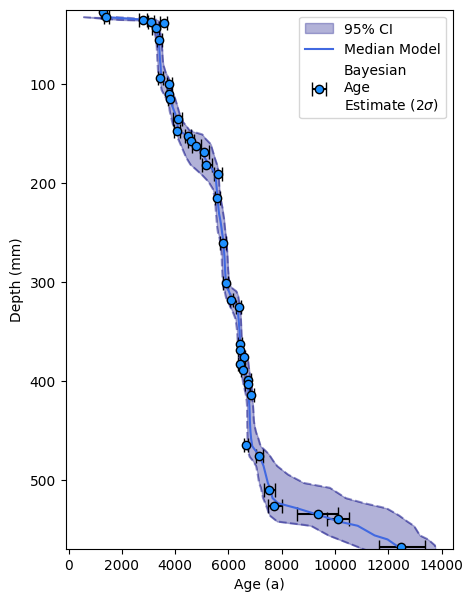

In [9]:
test.Get_Age_Depth_Plot()

In [10]:
test.Save_Age_Depth_Model()

Age/Depth model saved to: Schorndorf2023_Age_Depth_Model.xlsx


In [11]:
# IBIS Proxy class
import IBIS_Proxy

In [15]:
import pandas as pd
# Read in the MCMC posteriors
df_age = pd.read_excel('Schorndorf2023_U_Series_Ages.xlsx')
df_inT = pd.read_excel('Schorndorf2023_Initial_Thoriums.xlsx')
df_inU = pd.read_excel('Schorndorf2023_Initial_234U.xlsx')

df_agedepth = pd.read_csv('/Schorndorf2023_Age_Depth_Model.csv')

In [29]:
def MakePlottingDataFrame(df_age, df_inTh, df_inU): 

    df = pd.DataFrame({"Age": df_age['U_ages'].values, 
                      "Age_low": df_age['U_Age_low'].values, 
                      "Age_high": df_age['U_Age_high'].values, 
                       "Initial Th230": df_inTh['Model_initial_th'].values, 
                      "Initial Th230 low": df_inTh['M_Initial_Thorium_err1'].values, 
                      "Initial Th230 high": df_inTh['M_Initial_Thorium_err2'].values, 
                      "Initial U234": df_inU['Model_initial_234U'].values, 
                      "Initial U234 low": df_inU['Model_initial_234U_err1'].values, 
                      "Initial U234 high": df_inU['Model_initial_234U_err2'].values, 
                      "Depth": df_age['Depth_Meas'].values})

    return df

In [30]:
df_all = MakePlottingDataFrame(df_age, df_inT, df_inU)

In [31]:
# Add fine scale proxy - rolling correlation test
test = IBIS_Proxy.IbisProxy(df_all, df_agedepth)

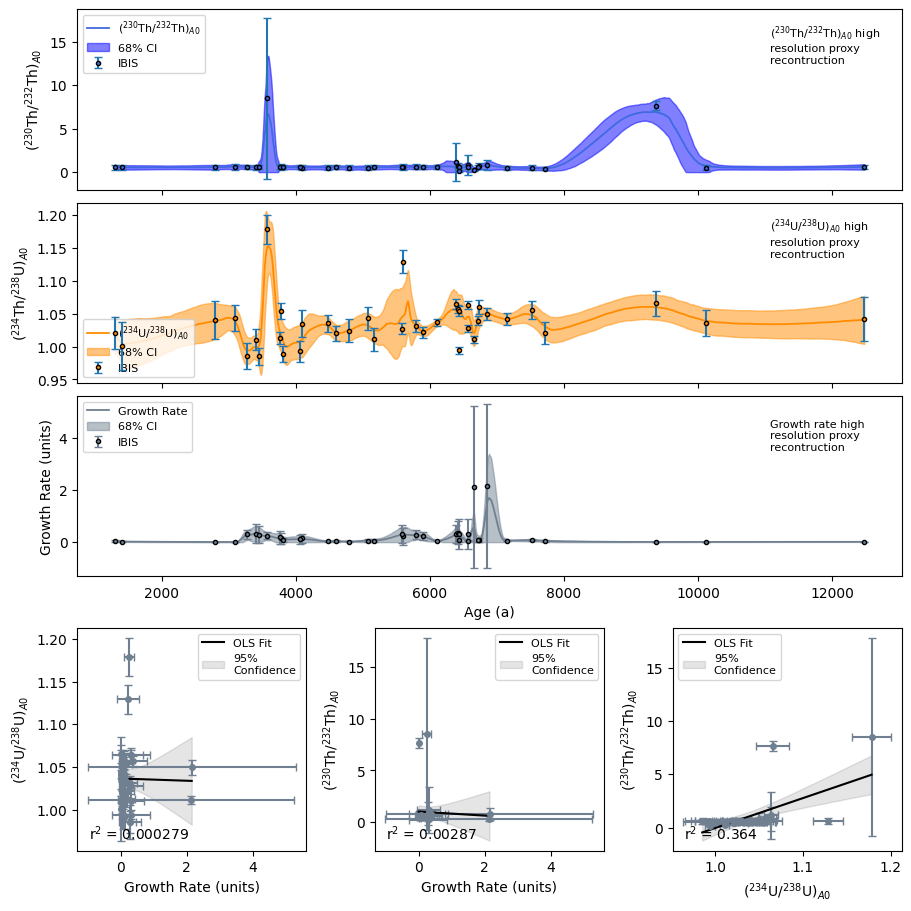

In [32]:
test.Proxy_Plot_All(save = False)